## DBSCAN

**DBSCAN infers the number of clusters based on the data, and it can discover clusters of arbitrary shape (for comparison, K-Means usually discovers spherical clusters)**

* ɛ(eps): The radius of our neighborhoods around a data point p.
* min_samples : The minimum number of data points we want in a neighborhood to define a cluster.

#### Working

* Pick a point at random that has not been assigned to a cluster or been designated as an outlier. Compute its neighborhood to determine if it’s a core point. If yes, start a cluster around this point. If no, label the point as an outlier.
* Then, expand cluster by adding all directly-reachable points to the cluster. Perform “neighborhood jumps” to find all density-reachable points and add them to the cluster. If an outlier is added, change that point’s status from outlier to border point.
* Repeat these two steps until all points are either assigned to a cluster or designated as an outlier.

In [9]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

In [10]:
cd

C:\Users\HP


In [11]:
data =  pd.read_csv("my_machine-learning/datasets/wholesale_data.csv")

In [28]:
data = data[["Grocery", "Milk"]]

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [14]:
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)

In [15]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
dbsc = DBSCAN(eps = .5, min_samples = 15)
y_dbsc = dbsc.fit_predict(data)

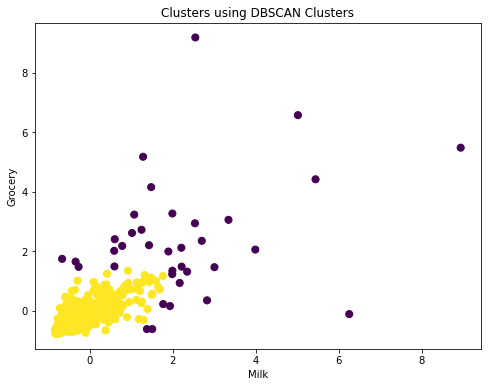

In [17]:
fig = plt.figure(figsize=(8,6))
plt.scatter(data[:, 0], data[:, 1], c=y_dbsc, s=50, cmap='viridis')
plt.title('Clusters using DBSCAN Clusters')
plt.ylabel('Grocery')
plt.xlabel('Milk')
plt.show()

In [18]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2)
y_kmeans = kmean.fit_predict(data)

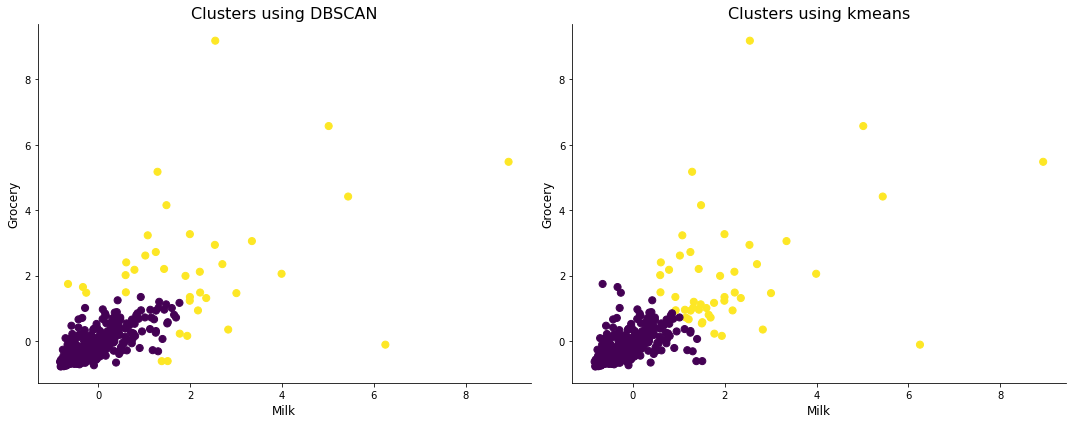

In [33]:
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.scatter(data[:, 0], data[:, 1], c=y_dbsc, s=50, cmap='viridis_r')
plt.title('Clusters using DBSCAN',fontsize=16)
plt.ylabel('Grocery',fontsize=12)
plt.xlabel('Milk', fontsize=12)

plt.subplot(122)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=50, cmap='viridis_r')

plt.title('Clusters using kmeans',fontsize=16)
plt.ylabel('Grocery',fontsize=12)
plt.xlabel('Milk',fontsize=12)

plt.tight_layout()
plt.show()

We can clearly see the difference between dbscan and kmeans (kmeans trying to create specrical clusters)

#### Disadv

* Things like the epsilon parameter for DBSCAN are less intuitive to reason about compared to number of clusters parameter for K-Means, so it’s more difficult to pick good initial parameter values for these algorithms.

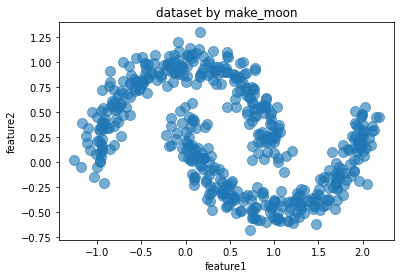

In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets
%matplotlib inline

X,_ = datasets.make_moons(500,noise = 0.1,random_state=1)
df = pd.DataFrame(X,columns = ['feature1','feature2'])

df.plot.scatter('feature1','feature2', s = 100,alpha = 0.6, title = 'dataset by make_moon')

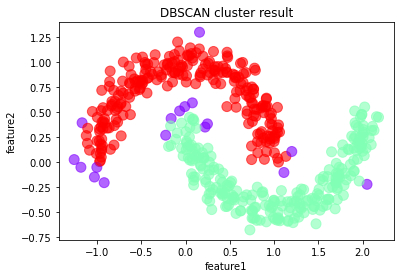

In [7]:
from sklearn.cluster import dbscan

core_samples,cluster_ids = dbscan(X, eps = 0.2, min_samples=20) 

df = pd.DataFrame(np.c_[X,cluster_ids],columns = ['feature1','feature2','cluster_id'])
df['cluster_id'] = df['cluster_id'].astype('i2')

df.plot.scatter('feature1','feature2', s = 100,
    c = list(df['cluster_id']),cmap = 'rainbow',colorbar = False,
    alpha = 0.6,title = 'DBSCAN cluster result')